In [0]:
from google.colab import files
files.upload()

In [2]:
import json
import pickle

import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
from keras.layers import *
from keras.models import Sequential
from keras.models import model_from_json
from keras.optimizers import Adam

np.random.seed(1234)

Using TensorFlow backend.


In [0]:
def get_image_data(num_training=63000, num_validation=1000, num_test=10000):
    """
    Load the image dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.
    """
    # Load the raw image data
    image_dir = "test-32data.save"

    data = pickle.load(open(image_dir, 'rb'))
    X_train, y_train, X_test, y_test = data['data'][:80000],data['label'][:80000],data['data'][80000:],data['label'][80000:]
    X_train=np.array(X_train,'float64')
    y_train= np.array(y_train,'float64')
    X_test=np.array(X_test,'float64')
    y_test=np.array(y_test,'float64')
    # Subsample the data
    mask = range(num_training, num_training + num_validation)
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = range(num_training)
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = range(num_test)
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    return X_train, y_train, X_val, y_val, X_test, y_test
  
def calculate_error(label1,label2):

    square_error = np.square(np.array(label1) - np.array(label2))

    error_sum=np.sum(square_error)/square_error.size

    return np.sqrt(error_sum) 

In [4]:


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_image_data()
y_train=y_train.reshape(-1,42)
y_val=y_val.reshape(-1,42)
y_test=y_test.reshape(-1,42)
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
set_session(tf.Session(config=config))

model = Sequential([
    Convolution2D(
        nb_filter=12,
        nb_row=5,
        nb_col=5,
        subsample=(2, 2),
        input_shape=(32, 32, 3)
    ),
    LeakyReLU(
        alpha=0.05
    ),
    Convolution2D(
        nb_filter=12,
        nb_row=5,
        nb_col=5,
#         subsample=(2, 2),
    ),
    LeakyReLU(
        alpha=0.05
    ),
#     Convolution2D(
#         nb_filter=12,
#         nb_row=5,
#         nb_col=5,
#     ),
#     LeakyReLU(
#         alpha=0.05
#     ),
    Flatten(),
    Dense(
        output_dim=1024,
        activation='relu'
    ),
    Dense(
        output_dim=1024,
        activation='relu'
    ),
#         Dense(
#             output_dim=30,
#         ),
    Dense(
        output_dim=42,
#             weights=(pca_eigenvectors, pca_mean),
        trainable=False
    )
])

model.compile(
    optimizer=Adam(),
    loss='mse'
)

model.fit(
    X_train,
    y_train,
    batch_size=100,
    epochs=50,
)


Train data shape:  (63000, 32, 32, 3)
Train labels shape:  (63000, 42)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000, 42)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000, 42)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(input_shape=(32, 32, 3..., kernel_size=(5, 5), filters=12, strides=(2, 2))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(kernel_size=(5, 5), filters=12)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=1024)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=1024)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:59: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(trainable=False, units=42)`


Epoch 1/50
63000/63000 [==============================] - 10s 154us/step - loss: 8.3693
Epoch 2/50
63000/63000 [==============================] - 9s 138us/step - loss: 2.6771
Epoch 3/50
63000/63000 [==============================] - 9s 141us/step - loss: 1.8937
Epoch 4/50
22100/63000 [=========>....................] - ETA: 5s - loss: 1.4512

63000/63000 [==============================] - 9s 138us/step - loss: 1.5092
Epoch 5/50
63000/63000 [==============================] - 9s 138us/step - loss: 1.2832
Epoch 6/50
63000/63000 [==============================] - 9s 141us/step - loss: 1.1431
Epoch 7/50
34500/63000 [===============>..............] - ETA: 3s - loss: 0.9458

63000/63000 [==============================] - 9s 138us/step - loss: 0.9914
Epoch 8/50
63000/63000 [==============================] - 9s 137us/step - loss: 0.9613
Epoch 9/50
63000/63000 [==============================] - 9s 138us/step - loss: 0.9297
Epoch 10/50
35900/63000 [================>.............] - ETA: 3s - loss: 0.7611

63000/63000 [==============================] - 9s 141us/step - loss: 0.8427
Epoch 11/50
63000/63000 [==============================] - 9s 139us/step - loss: 0.7820
Epoch 12/50
63000/63000 [==============================] - 9s 138us/step - loss: 0.7659
Epoch 13/50
36300/63000 [================>.............] - ETA: 3s - loss: 0.7088

63000/63000 [==============================] - 9s 143us/step - loss: 0.7227
Epoch 14/50
63000/63000 [==============================] - 9s 139us/step - loss: 0.6950
Epoch 15/50
63000/63000 [==============================] - 9s 138us/step - loss: 0.6476
Epoch 16/50
36500/63000 [================>.............] - ETA: 3s - loss: 0.5855

63000/63000 [==============================] - 9s 139us/step - loss: 0.6293
Epoch 17/50
63000/63000 [==============================] - 9s 140us/step - loss: 0.6110
Epoch 18/50
63000/63000 [==============================] - 9s 137us/step - loss: 0.5778
Epoch 19/50
36100/63000 [================>.............] - ETA: 3s - loss: 0.5406

63000/63000 [==============================] - 9s 138us/step - loss: 0.5529
Epoch 20/50
63000/63000 [==============================] - 9s 140us/step - loss: 0.5661
Epoch 21/50
63000/63000 [==============================] - 9s 136us/step - loss: 0.5077
Epoch 22/50
36900/63000 [================>.............] - ETA: 3s - loss: 0.4857

63000/63000 [==============================] - 9s 135us/step - loss: 0.4871
Epoch 23/50
63000/63000 [==============================] - 9s 138us/step - loss: 0.5303
Epoch 24/50
63000/63000 [==============================] - 9s 135us/step - loss: 0.5012
Epoch 25/50
37300/63000 [================>.............] - ETA: 3s - loss: 0.4368

63000/63000 [==============================] - 8s 135us/step - loss: 0.4573
Epoch 26/50
63000/63000 [==============================] - 9s 135us/step - loss: 0.4311
Epoch 27/50
63000/63000 [==============================] - 9s 139us/step - loss: 0.4466
Epoch 28/50
36300/63000 [================>.............] - ETA: 3s - loss: 0.4290

63000/63000 [==============================] - 8s 134us/step - loss: 0.4348
Epoch 29/50
63000/63000 [==============================] - 9s 136us/step - loss: 0.4004
Epoch 30/50
63000/63000 [==============================] - 9s 138us/step - loss: 0.4370
Epoch 31/50
36700/63000 [================>.............] - ETA: 3s - loss: 0.4088

63000/63000 [==============================] - 9s 137us/step - loss: 0.4226
Epoch 32/50
63000/63000 [==============================] - 9s 136us/step - loss: 0.4014
Epoch 33/50
63000/63000 [==============================] - 9s 135us/step - loss: 0.3713
Epoch 34/50
37000/63000 [================>.............] - ETA: 3s - loss: 0.3573

63000/63000 [==============================] - 9s 138us/step - loss: 0.3694
Epoch 35/50
63000/63000 [==============================] - 8s 135us/step - loss: 0.3793
Epoch 36/50
63000/63000 [==============================] - 8s 135us/step - loss: 0.3441
Epoch 37/50
37400/63000 [================>.............] - ETA: 3s - loss: 0.3607

63000/63000 [==============================] - 9s 136us/step - loss: 0.3560
Epoch 38/50
63000/63000 [==============================] - 9s 137us/step - loss: 0.3619
Epoch 39/50
63000/63000 [==============================] - 9s 135us/step - loss: 0.3593
Epoch 40/50
37300/63000 [================>.............] - ETA: 3s - loss: 0.3430

63000/63000 [==============================] - 9s 136us/step - loss: 0.3501
Epoch 41/50
63000/63000 [==============================] - 9s 139us/step - loss: 0.3164
Epoch 42/50
63000/63000 [==============================] - 9s 135us/step - loss: 0.3174
Epoch 43/50
37400/63000 [================>.............] - ETA: 3s - loss: 0.3062

63000/63000 [==============================] - 9s 135us/step - loss: 0.3022
Epoch 44/50
63000/63000 [==============================] - 9s 137us/step - loss: 0.3264
Epoch 45/50
63000/63000 [==============================] - 9s 136us/step - loss: 0.3448
Epoch 46/50
37400/63000 [================>.............] - ETA: 3s - loss: 0.2878

63000/63000 [==============================] - 9s 135us/step - loss: 0.2913
Epoch 47/50
63000/63000 [==============================] - 9s 136us/step - loss: 0.2897
Epoch 48/50
63000/63000 [==============================] - 9s 138us/step - loss: 0.3055
Epoch 49/50
36900/63000 [================>.............] - ETA: 3s - loss: 0.2881

63000/63000 [==============================] - 9s 136us/step - loss: 0.3002
Epoch 50/50
63000/63000 [==============================] - 9s 136us/step - loss: 0.2755


In [5]:

# Load the raw image data
image_dir = "test-32data.save"

data = pickle.load(open(image_dir, 'rb'))
X_train, y_train, X_test, y_test = data['data'][:80000],data['label'][:80000],data['data'][80000:],data['label'][80000:]



sample = np.array(X_train, 'float64')
mean_image = np.mean(sample, axis=0)
sample -= mean_image
predictions_train = model.predict(sample).reshape(-1, 21, 2)

sample = np.array(X_val, 'float64')
mean_image = np.mean(sample, axis=0)
sample -= mean_image
predictions_val = model.predict(sample)

sample = np.array(X_test, 'float64')
mean_image = np.mean(sample, axis=0)
sample -= mean_image
predictions_test = model.predict(sample).reshape(-1, 21, 2)


print("Train set pixels error: %s"%(calculate_error(y_train,predictions_train)))
print("Validation set pixels error: %s" % (calculate_error(y_val, predictions_val)))
print("Test set pixels error: %s" % (calculate_error(y_test, predictions_test)))



Train set pixels error: 0.759125413221096
Validation set pixels error: 1.089386272154076
Test set pixels error: 1.0882259505136092


Predict joint position


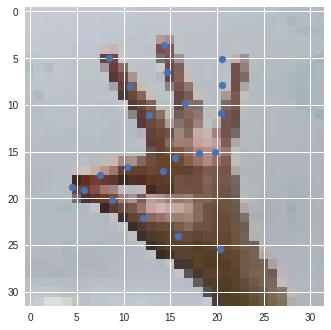

Actual joint position


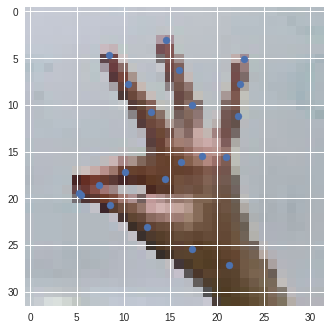

In [6]:

print("Predict joint position")

# data_file_name = json.load(open("data_file_name.json", 'r'))
# demo_index = data_file_name.index('074_587_R')
demo_index=1000
demo = X_test[demo_index]

out = predictions_test[demo_index]
plt.imshow(cv2.cvtColor(X_test[demo_index], cv2.COLOR_BGR2RGB))
plt.scatter(out[:, 1], out[:, 0])
plt.show()

print("Actual joint position")
demo_index=demo_index+80000
demo = data['data'][demo_index]

plt.imshow(cv2.cvtColor(demo, cv2.COLOR_BGR2RGB))
plt.scatter(data['label'][demo_index][:, 1], data['label'][demo_index][:, 0])
plt.show()

Predict joint position


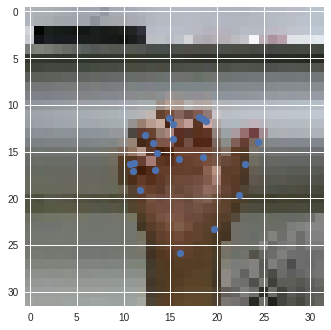

Actual joint position


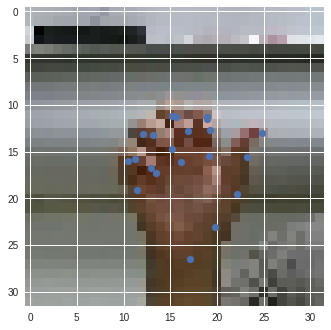

In [7]:
print("Predict joint position")

# data_file_name = json.load(open("data_file_name.json", 'r'))
# demo_index = data_file_name.index('074_587_R')
demo_index=1005
demo = X_test[demo_index]

out = predictions_test[demo_index]
plt.imshow(cv2.cvtColor(X_test[demo_index], cv2.COLOR_BGR2RGB))
plt.scatter(out[:, 1], out[:, 0])
plt.show()

print("Actual joint position")
demo_index=demo_index+80000
demo = data['data'][demo_index]

plt.imshow(cv2.cvtColor(demo, cv2.COLOR_BGR2RGB))
plt.scatter(data['label'][demo_index][:, 1], data['label'][demo_index][:, 0])
plt.show()

Predict joint position


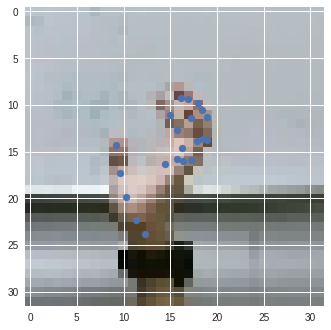

Actual joint position


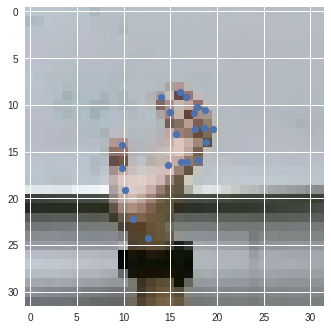

In [8]:
print("Predict joint position")

# data_file_name = json.load(open("data_file_name.json", 'r'))
# demo_index = data_file_name.index('074_587_R')
demo_index=1015
demo = X_test[demo_index]

out = predictions_test[demo_index]
plt.imshow(cv2.cvtColor(X_test[demo_index], cv2.COLOR_BGR2RGB))
plt.scatter(out[:, 1], out[:, 0])
plt.show()

print("Actual joint position")
demo_index=demo_index+80000
demo = data['data'][demo_index]

plt.imshow(cv2.cvtColor(demo, cv2.COLOR_BGR2RGB))
plt.scatter(data['label'][demo_index][:, 1], data['label'][demo_index][:, 0])
plt.show()